In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [3]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
df.shape

(9, 7)

In [7]:
pd.set_option('display.precision', 0)

In [8]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,1e+08,104,PUTNAM,Y,3,1,1000
1,1e+08,197,LEXINGTON,N,3,1.5,--
2,1e+08,NaN,LEXINGTON,N,NaN,1,850
3,1e+08,201,BERKELEY,12,1,NaN,700
4,NaN,203,BERKELEY,Y,3,2,1600
5,1e+08,207,BERKELEY,Y,NaN,1,800
6,1e+08,NaN,WASHINGTON,NaN,2,HURLEY,950
7,1e+08,213,TREMONT,Y,--,1,NaN
8,1e+08,215,TREMONT,Y,na,2,1800


In [9]:
#deteksi data hilang dgn teknik otomatis pandas
# perhatikan kolom ST_NUM dahulu
df['ST_NUM']

0    104
1    197
2    NaN
3    201
4    203
5    207
6    NaN
7    213
8    215
Name: ST_NUM, dtype: float64

In [11]:
df['ST_NUM'].isnull() #isinya true atau false aja

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [12]:
#kita perlu beritahu pandas yang datanya sama dengan NaN (data hilang)
missing_values = ["n/a",'Na', 'na','NA','--']

In [13]:
# run ulang datanya, tapi kasih tau pandas data yg sama dgn null
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values = missing_values)

In [14]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,1e+08,104,PUTNAM,Y,3,1,1000
1,1e+08,197,LEXINGTON,N,3,1.5,NaN
2,1e+08,NaN,LEXINGTON,N,NaN,1,850
3,1e+08,201,BERKELEY,12,1,NaN,700
4,NaN,203,BERKELEY,Y,3,2,1600
5,1e+08,207,BERKELEY,Y,NaN,1,800
6,1e+08,NaN,WASHINGTON,NaN,2,HURLEY,950
7,1e+08,213,TREMONT,Y,NaN,1,NaN
8,1e+08,215,TREMONT,Y,NaN,2,1800


In [16]:
df['NUM_BATH'].isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
Name: NUM_BATH, dtype: bool

In [17]:
#cek data unexpected
counter = 0
for row in df['NUM_BATH']:
    try:
        float(row) #kalau ada yg gaberhasil nanti ubah ke  nan
    except:
        df.loc[counter, 'NUM_BATH'] = np.nan
    counter += 1

df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,1e+08,104,PUTNAM,Y,3,1,1000
1,1e+08,197,LEXINGTON,N,3,1.5,NaN
2,1e+08,NaN,LEXINGTON,N,NaN,1,850
3,1e+08,201,BERKELEY,12,1,NaN,700
4,NaN,203,BERKELEY,Y,3,2,1600
5,1e+08,207,BERKELEY,Y,NaN,1,800
6,1e+08,NaN,WASHINGTON,NaN,2,NaN,950
7,1e+08,213,TREMONT,Y,NaN,1,NaN
8,1e+08,215,TREMONT,Y,NaN,2,1800


In [18]:
counter = 0
for row in df['OWN_OCCUPIED']:
    try:
        int(row) #kalau ada yg berhasil nanti ubah ke  nan
        df.loc[counter, 'OWN_OCCUPIED'] = np.nan
    except:
        pass
    counter += 1

df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,1e+08,104,PUTNAM,Y,3,1,1000
1,1e+08,197,LEXINGTON,N,3,1.5,NaN
2,1e+08,NaN,LEXINGTON,N,NaN,1,850
3,1e+08,201,BERKELEY,NaN,1,NaN,700
4,NaN,203,BERKELEY,Y,3,2,1600
5,1e+08,207,BERKELEY,Y,NaN,1,800
6,1e+08,NaN,WASHINGTON,NaN,2,NaN,950
7,1e+08,213,TREMONT,Y,NaN,1,NaN
8,1e+08,215,TREMONT,Y,NaN,2,1800


In [19]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        2
SQ_FT           2
dtype: int64

In [22]:
df.isnull().values.any()

True

In [24]:
df.isnull().sum().sum()

13

In [25]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,1e+08,104,PUTNAM,Y,3,1,1000
1,1e+08,197,LEXINGTON,N,3,1.5,NaN
2,1e+08,NaN,LEXINGTON,N,NaN,1,850
3,1e+08,201,BERKELEY,NaN,1,NaN,700
4,NaN,203,BERKELEY,Y,3,2,1600
5,1e+08,207,BERKELEY,Y,NaN,1,800
6,1e+08,NaN,WASHINGTON,NaN,2,NaN,950
7,1e+08,213,TREMONT,Y,NaN,1,NaN
8,1e+08,215,TREMONT,Y,NaN,2,1800


In [28]:
df["ST_NUM"].fillna(125, inplace = True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,1e+08,104,PUTNAM,Y,3,1,1000
1,1e+08,197,LEXINGTON,N,3,1.5,NaN
2,1e+08,125,LEXINGTON,N,NaN,1,850
3,1e+08,201,BERKELEY,NaN,1,NaN,700
4,NaN,203,BERKELEY,Y,3,2,1600
5,1e+08,207,BERKELEY,Y,NaN,1,800
6,1e+08,125,WASHINGTON,NaN,2,NaN,950
7,1e+08,213,TREMONT,Y,NaN,1,NaN
8,1e+08,215,TREMONT,Y,NaN,2,1800


In [29]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace = True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,1e+08,104,PUTNAM,Y,3,1,1000
1,1e+08,197,LEXINGTON,N,3,1.5,NaN
2,1e+08,125,LEXINGTON,N,3,1,850
3,1e+08,201,BERKELEY,NaN,1,NaN,700
4,NaN,203,BERKELEY,Y,3,2,1600
5,1e+08,207,BERKELEY,Y,3,1,800
6,1e+08,125,WASHINGTON,NaN,2,NaN,950
7,1e+08,213,TREMONT,Y,3,1,NaN
8,1e+08,215,TREMONT,Y,3,2,1800


## Contoh lain - data obesitas

In [33]:
obes = pd.ExcelFile('obes.xls')
obes

In [34]:
obes.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [35]:
data_age = obes.parse(u'7.2', skiprows = 4, skipfooter=14)
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275,400,65,136,289,216,94,52,23
2,2003/04,1711,579,67,174,391,273,151,52,24
3,2004/05,2035,547,107,287,487,364,174,36,32
4,2005/06,2564,583,96,341,637,554,258,72,20
5,2006/07,3862,656,184,461,1069,872,459,118,43
6,2007/08,5018,747,228,564,1469,1198,598,157,53
7,2008/09,7988,775,322,1013,2359,2133,1099,221,63
8,2009/10,10571,632,361,1348,3132,3076,1555,378,87
9,2010/11,11574,525,375,1425,3277,3573,1820,456,115


In [40]:
# ubah nama kolom, gunakan opsi inplace untuk rubah data awal
data_age.rename(columns={'Unnamed: 0':'Year'},inplace=True)

In [39]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275,400,65,136,289,216,94,52,23
2,2003/04,1711,579,67,174,391,273,151,52,24
3,2004/05,2035,547,107,287,487,364,174,36,32
4,2005/06,2564,583,96,341,637,554,258,72,20
5,2006/07,3862,656,184,461,1069,872,459,118,43
6,2007/08,5018,747,228,564,1469,1198,598,157,53
7,2008/09,7988,775,322,1013,2359,2133,1099,221,63
8,2009/10,10571,632,361,1348,3132,3076,1555,378,87
9,2010/11,11574,525,375,1425,3277,3573,1820,456,115


In [41]:
#hapus row yang kosong
data_age.dropna(inplace=True)
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275,400,65,136,289,216,94,52,23
2,2003/04,1711,579,67,174,391,273,151,52,24
3,2004/05,2035,547,107,287,487,364,174,36,32
4,2005/06,2564,583,96,341,637,554,258,72,20
5,2006/07,3862,656,184,461,1069,872,459,118,43
6,2007/08,5018,747,228,564,1469,1198,598,157,53
7,2008/09,7988,775,322,1013,2359,2133,1099,221,63
8,2009/10,10571,632,361,1348,3132,3076,1555,378,87
9,2010/11,11574,525,375,1425,3277,3573,1820,456,115
10,2011/12,11736,495,391,1484,3104,3581,2119,468,94


In [43]:
#kita gunakan Column 'Year' sebagai index, agar index kita lebih informatif
data_age.set_index('Year', inplace=True)
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275,400,65,136,289,216,94,52,23
2003/04,1711,579,67,174,391,273,151,52,24
2004/05,2035,547,107,287,487,364,174,36,32
2005/06,2564,583,96,341,637,554,258,72,20
2006/07,3862,656,184,461,1069,872,459,118,43
2007/08,5018,747,228,564,1469,1198,598,157,53
2008/09,7988,775,322,1013,2359,2133,1099,221,63
2009/10,10571,632,361,1348,3132,3076,1555,378,87
2010/11,11574,525,375,1425,3277,3573,1820,456,115


<AxesSubplot:xlabel='Year'>

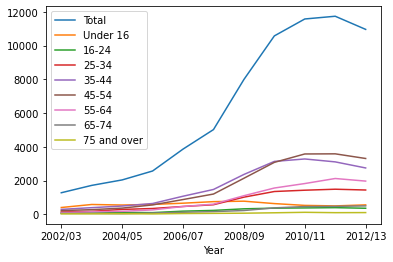

In [44]:
%matplotlib inline
data_age.plot()

<AxesSubplot:xlabel='Year'>

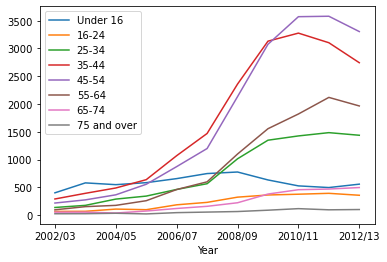

In [46]:
#hapus kolom total karena mengganggu plot kita
obes_age = data_age.drop('Total',axis=1)
obes_age.plot()

<AxesSubplot:xlabel='Year'>

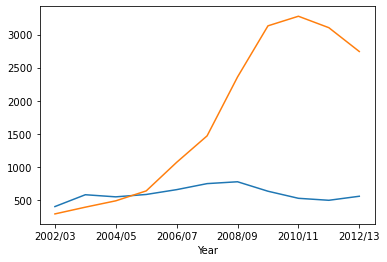

In [52]:
# di sini kita menganalisa data, sesuai pertanyaan awal, lalu tarik kesimpulan
data_age['Under 16'].plot()
data_age['35-44'].plot()

<AxesSubplot:xlabel='Year'>

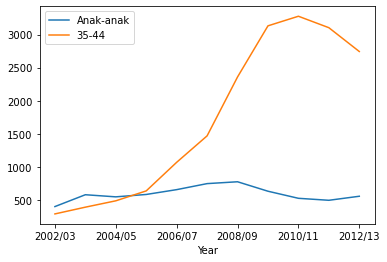

In [53]:
data_age['Under 16'].plot(label="Anak-anak", legend=True)
data_age['35-44'].plot(label='35-44', legend=True)

 Kesimpulan : dari data yang diberikan, dapat dilihat bahwa anak2 <16 tidak bertambah berat

## Time Series

In [54]:
from datetime import datetime

In [55]:
range(2,11,2)

range(2, 11, 2)

In [57]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [65]:
tanggal = pd.DataFrame(date_rng, columns=['date'])
tanggal['data'] = np.random.randint(0,100,size=(len(date_rng)))
tanggal

,date,data
0,2020-01-01 00:00:00,95
1,2020-01-01 01:00:00,72
2,2020-01-01 02:00:00,64
3,2020-01-01 03:00:00,83
4,2020-01-01 04:00:00,84
...,...,...
164,2020-01-07 20:00:00,6
165,2020-01-07 21:00:00,88
166,2020-01-07 22:00:00,24
167,2020-01-07 23:00:00,24


In [76]:
tanggal.info()
# misalnya data kita belum bertime datetime, kita bisa convert tipe datanya ke datetime dengan .to_datetime()
tanggal['datetime'] = pd.to_datetime(tanggal['date'])
tanggal

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169 entries, 2020-01-01 00:00:00 to 2020-01-08 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   data    169 non-null    int32
dtypes: int32(1)
memory usage: 2.0 KB


KeyError: 'date'

In [68]:
tanggal = tanggal.set_index('datetime')
tanggal

,date,data
datetime,,
2020-01-01 00:00:00,2020-01-01 00:00:00,95
2020-01-01 01:00:00,2020-01-01 01:00:00,72
2020-01-01 02:00:00,2020-01-01 02:00:00,64
2020-01-01 03:00:00,2020-01-01 03:00:00,83
2020-01-01 04:00:00,2020-01-01 04:00:00,84
...,...,...
2020-01-07 20:00:00,2020-01-07 20:00:00,6
2020-01-07 21:00:00,2020-01-07 21:00:00,88
2020-01-07 22:00:00,2020-01-07 22:00:00,24


In [69]:
tanggal.drop(['date'], axis=1, inplace=True)
tanggal

,data
datetime,
2020-01-01 00:00:00,95
2020-01-01 01:00:00,72
2020-01-01 02:00:00,64
2020-01-01 03:00:00,83
2020-01-01 04:00:00,84
...,...
2020-01-07 20:00:00,6
2020-01-07 21:00:00,88
2020-01-07 22:00:00,24


In [70]:
# ubah datetime jadi string
str_date_rng = [str(x) for x in date_rng]
str_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [71]:
timestamp_date_rng = pd.to_datetime(str_date_rng, infer_datetime_format=True)
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [80]:
# mengambil data spesifik per tanggal dari dataframe kita tadi
tanggal.loc['2020-01-05'] # tahun-bulan-tanggal, kita bisa ambil data untuk tanggal spesifik
# isinya ada 24 karena kita tadi buat datanya per jam

,data
datetime,
2020-01-05 00:00:00,48
2020-01-05 01:00:00,80
2020-01-05 02:00:00,72
2020-01-05 03:00:00,84
2020-01-05 04:00:00,99
2020-01-05 05:00:00,76
2020-01-05 06:00:00,4
2020-01-05 07:00:00,19
2020-01-05 08:00:00,31


In [79]:
tanggal['2020-01-05'].shape

<ipython-input-79-34f9b0bdf0fe>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tanggal['2020-01-05'].shape


(24, 1)

In [82]:
# ambil range datetime
tanggal['2020-01-04':'2020-01-06']

,data
datetime,
2020-01-04 00:00:00,38
2020-01-04 01:00:00,87
2020-01-04 02:00:00,34
2020-01-04 03:00:00,49
2020-01-04 04:00:00,94
...,...
2020-01-06 19:00:00,62
2020-01-06 20:00:00,87
2020-01-06 21:00:00,80


In [83]:
tanggal['2020-01-04 09:00:00':'2020-01-04 21:00:00']

,data
datetime,
2020-01-04 09:00:00,86
2020-01-04 10:00:00,34
2020-01-04 11:00:00,99
2020-01-04 12:00:00,81
2020-01-04 13:00:00,29
2020-01-04 14:00:00,84
2020-01-04 15:00:00,85
2020-01-04 16:00:00,8
2020-01-04 17:00:00,58


In [84]:
# menggunakan datetime sebagai index lebih mempermudah dibanding
# menggunakan string biasa sebagai index
# kita juga bisa pakai resample untuk mengubah jumlah datanya, misalnya per hari bukan per jam
# cara rangkum datanya apakah mau di min, max, mean (rata2), sum, atau lainnya?
tanggal.resample('D').sum()

,data
datetime,
2020-01-01,1223
2020-01-02,1275
2020-01-03,1338
2020-01-04,1331
2020-01-05,1196
2020-01-06,1297
2020-01-07,1254
2020-01-08,19


In [86]:
# juga bisa buat yang lebih menarik lagi seperti rolling sum
# contohnya melihat total customer 3 hari terakhir
tanggal.resample('D').sum().rolling(3).sum()

,data
datetime,
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,3836
2020-01-04,3944
2020-01-05,3865
2020-01-06,3824
2020-01-07,3747
2020-01-08,2570


In [87]:
# contohnya melihat total customer 3 jam terakhir
tanggal.rolling(3).sum()

,data
datetime,
2020-01-01 00:00:00,NaN
2020-01-01 01:00:00,NaN
2020-01-01 02:00:00,231
2020-01-01 03:00:00,219
2020-01-01 04:00:00,231
...,...
2020-01-07 20:00:00,97
2020-01-07 21:00:00,104
2020-01-07 22:00:00,118


In [88]:
tanggal['rolling_3jam'] = tanggal.rolling(3).sum()

In [89]:
tanggal

,data,rolling_3jam
datetime,,
2020-01-01 00:00:00,95,NaN
2020-01-01 01:00:00,72,NaN
2020-01-01 02:00:00,64,231
2020-01-01 03:00:00,83,219
2020-01-01 04:00:00,84,231
...,...,...
2020-01-07 20:00:00,6,97
2020-01-07 21:00:00,88,104
2020-01-07 22:00:00,24,118


In [92]:
# metode lain fillna bisa dilihat di sini 
#juga https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
tanggal['rolling_3jam'] = tanggal['rolling_3jam'].fillna(method='backfill')
tanggal

,data,rolling_3jam
datetime,,
2020-01-01 00:00:00,95,231
2020-01-01 01:00:00,72,231
2020-01-01 02:00:00,64,231
2020-01-01 03:00:00,83,219
2020-01-01 04:00:00,84,231
...,...,...
2020-01-07 20:00:00,6,97
2020-01-07 21:00:00,88,104
2020-01-07 22:00:00,24,118


## Menggunakan datetime index di data asli

lihat di Menggunakan datetime index di data asli.ipynb